In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_psd_20feat = pd.read_csv("../data/mrmr_selected/MRMR_selected_20_psd_580features.csv", index_col=0)
df_psd_100feat = pd.read_csv("../data/mrmr_selected/MRMR_selected_100_psd_580features.csv", index_col=0)

df_slp_20feat = pd.read_csv("../data/mrmr_selected/MRMR_selected_20_slopes_580features.csv", index_col=0)
df_slp_100feat = pd.read_csv("../data/mrmr_selected/MRMR_selected_100_slopes_580features.csv", index_col=0)

In [3]:
from scipy.stats import mannwhitneyu 

alpha = 0.25 

mwu_dict = dict()

for df_name, df in [("df_psd_20feat", df_psd_20feat), ("df_psd_100feat", df_psd_100feat), 
                    ("df_slp_20feat", df_slp_20feat), ("df_slp_100feat", df_slp_100feat)]:
    stat_test = pd.DataFrame(columns=['Statistics', 'p-value'])
    for i in range(0, 20):
        stat, p_value = mannwhitneyu(df[df.target == 0].iloc[:,i], 
                                     df[df.target == 1].iloc[:,i]) 
        if p_value < alpha: 
            feature = df.columns[i]
            #print(f'{feature} is statistically significant.')
            stat_test.loc[feature] = [stat, p_value]
            #print('Reject Null Hypothesis (Significant difference between two samples)') 
        #else: 
            #print('Do not Reject Null Hypothesis (No significant difference between two samples)')
            #stat_test[i] = False
    mwu_dict[df_name] = stat_test

In [4]:
for df in [df_psd_20feat, df_psd_100feat, df_slp_20feat, df_slp_100feat]:
    df['target'].replace({0:'CTRL', 1:'PD'}, inplace=True)

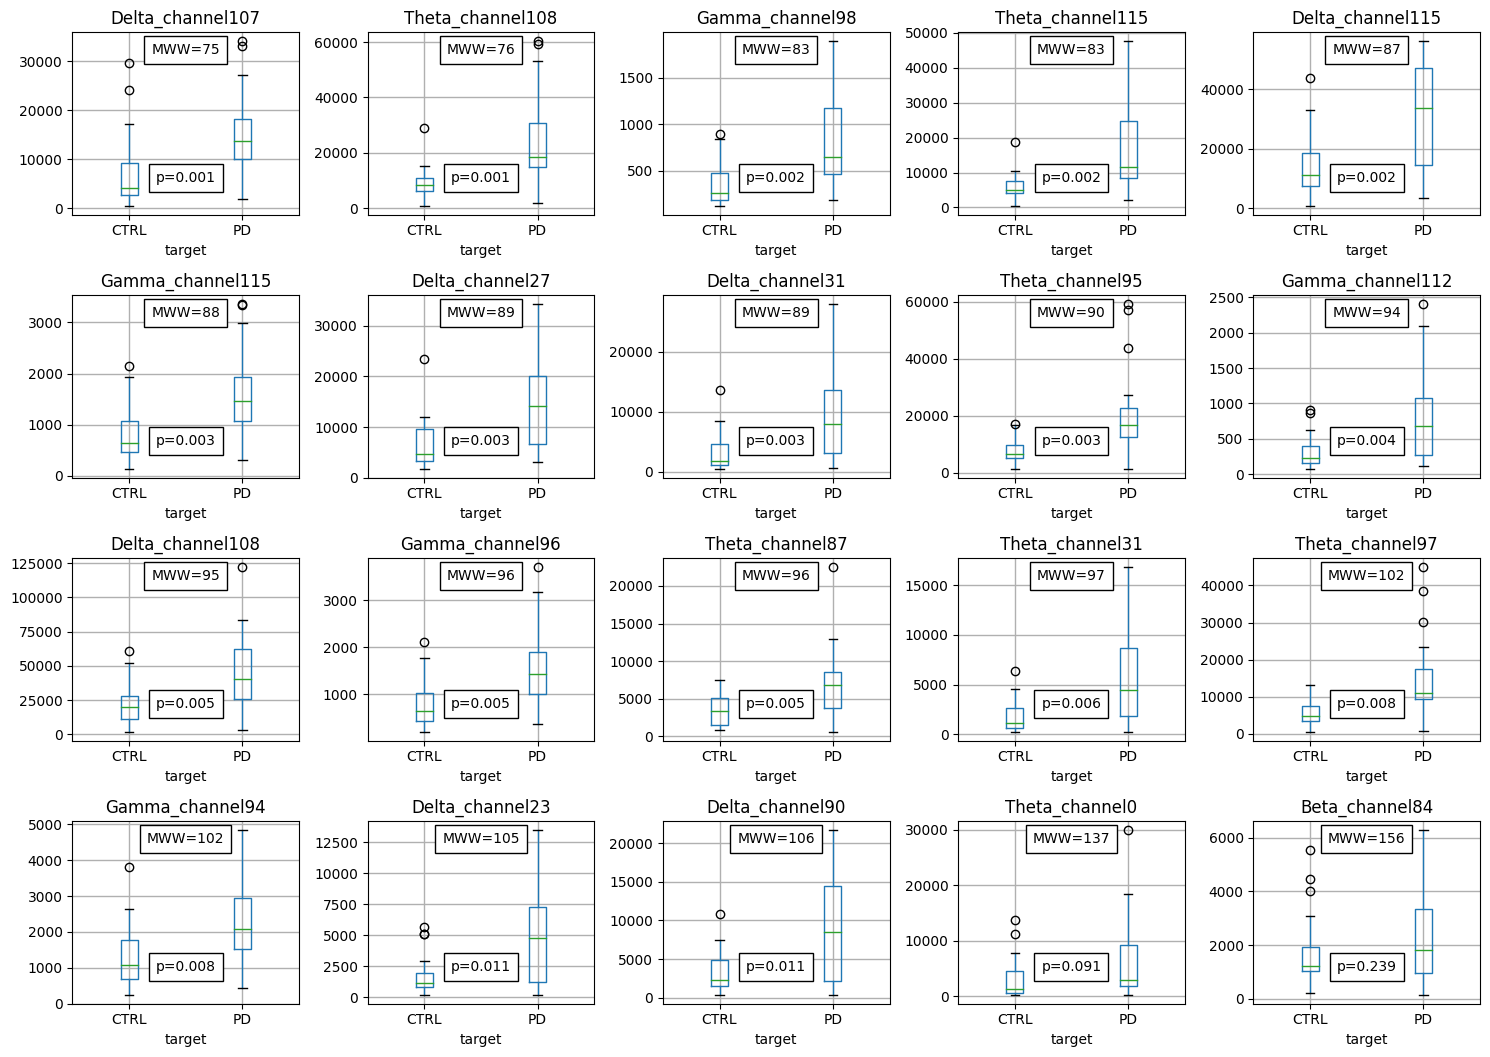

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
import os
from statannotations.Annotator import Annotator
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(4,5, figsize=(15, 11))

stat_test = mwu_dict['df_psd_20feat']

for i,el in enumerate(list(stat_test.sort_values(by='p-value').index)):
    a = df_psd_20feat.boxplot(el, by='target', ax=axes.flatten()[i])
    a.grid('on', which='major', linewidth=1)
#     a.legend([f'p-val: {stat_test.loc[el, ]["p-value"]:.3f}',
#               f'MWW: {stat_test.loc[el, ]["Statistics"]:.0f}'])

    a.text(x=0.50, y=.24, s=f'p={stat_test.loc[el, ]["p-value"]:.3f}', bbox={'facecolor':'w','pad':5}, 
           ha='center', va="top", transform=a.transAxes)
    a.text(x=0.50, y=0.94, s=f'MWW={stat_test.loc[el, ]["Statistics"]:.0f}', bbox={'facecolor':'w','pad':5},
             ha='center', va="top", transform=a.transAxes)
    #a.set_visible(False)
    #a.legend(f'p-val: {stat_test.loc[el, ]["p-value"]}')
    title = a.set_title("\n".join(wrap(el, 30)))
    title.set_y(1.05)

plt.tight_layout() 
plt.suptitle('')
plt.savefig('../figures/boxplots_sign_feats_psd.png', dpi=600)

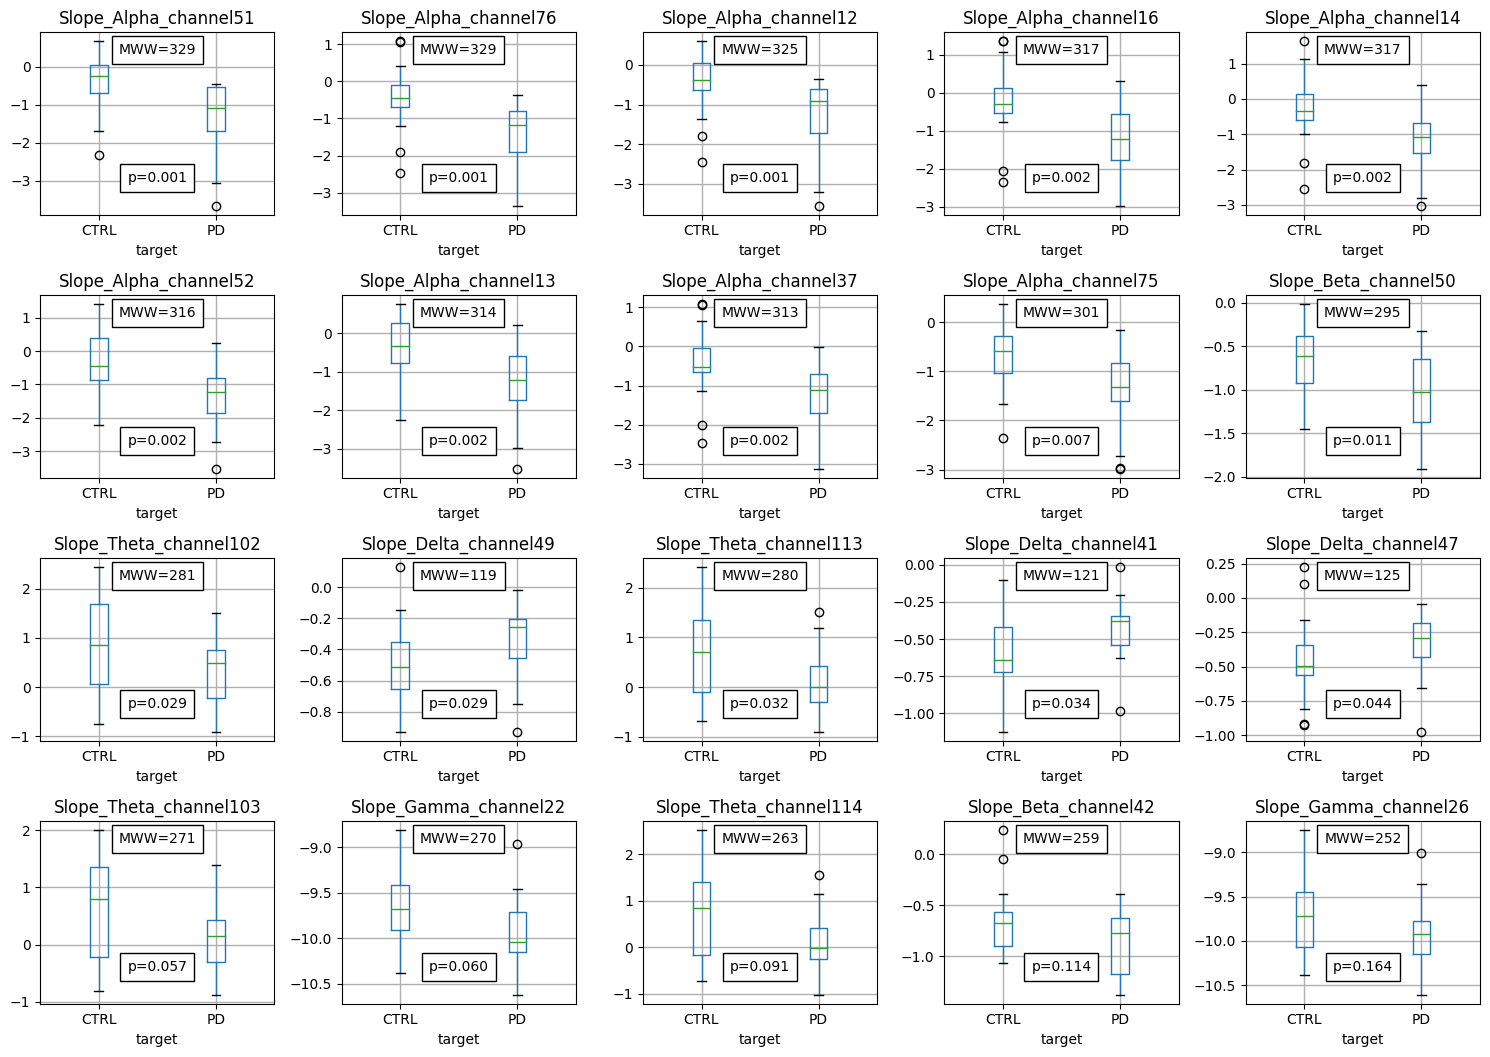

In [6]:
fig, axes = plt.subplots(4,5, figsize=(15, 11))

stat_test = mwu_dict['df_slp_20feat']

for i,el in enumerate(list(stat_test.sort_values(by='p-value').index)):
    a = df_slp_20feat.boxplot(el, by='target', ax=axes.flatten()[i])
    a.grid('on', which='major', linewidth=1)
#     a.legend([f'p-val: {stat_test.loc[el, ]["p-value"]:.3f}',
#               f'MWW: {stat_test.loc[el, ]["Statistics"]:.0f}'])

    a.text(x=0.50, y=.24, s=f'p={stat_test.loc[el, ]["p-value"]:.3f}', bbox={'facecolor':'w','pad':5}, 
           ha='center', va="top", transform=a.transAxes)
    a.text(x=0.50, y=0.94, s=f'MWW={stat_test.loc[el, ]["Statistics"]:.0f}', bbox={'facecolor':'w','pad':5},
             ha='center', va="top", transform=a.transAxes)
    #a.set_visible(False)
    #a.legend(f'p-val: {stat_test.loc[el, ]["p-value"]}')
    title = a.set_title("\n".join(wrap(el, 30)))
    title.set_y(1.05)

plt.tight_layout() 
plt.suptitle('')
plt.savefig('../figures/boxplots_sign_feats_slopes.png', dpi=600)

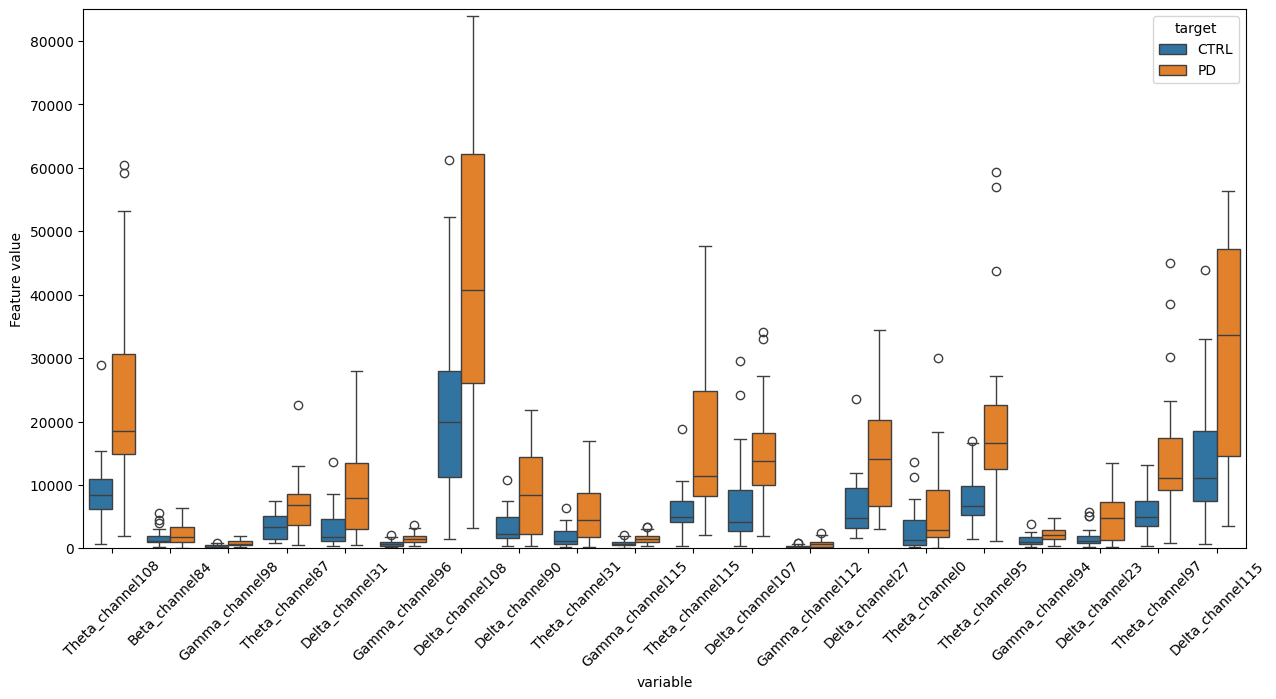

In [7]:
df_20_psd_stacked = pd.melt(df_psd_20feat, id_vars=['target'],
                           value_vars=list(df_psd_20feat.columns))

plt.figure(figsize=(15, 7))

sns.boxplot(x=df_20_psd_stacked.variable, y="value", hue="target", data=df_20_psd_stacked);
plt.ylabel('Feature value')
plt.ylim([0, 85000])

plt.xticks(rotation=45);

- How many feature out of 20 selected by mRMR are stat. sign. according to MWU?

In [8]:
alpha = 0.05
for df_name, df in [("df_psd_20feat", df_psd_20feat), ("df_slp_20feat", df_slp_20feat)]:
    stat_test = pd.DataFrame(columns=['Statistics', 'p-value'])
    for i in range(0, 20):
        stat, p_value = mannwhitneyu(df[df.target == 'CTRL'].iloc[:,i], 
                                     df[df.target == 'PD'].iloc[:,i]) 
        if p_value < alpha: 
            feature = df.columns[i]
            #print(f'{feature} is statistically significant.')
            stat_test.loc[feature] = [stat, p_value]
            #print('Reject Null Hypothesis (Significant difference between two samples)') 
        #else: 
            #print('Do not Reject Null Hypothesis (No significant difference between two samples)')
            #stat_test[i] = False
    print(f'For {df_name} there are: {stat_test.shape[0]} sign. feats out of 20. (p <= 0.05)')
    print(stat_test.shape)

For df_psd_20feat there are: 18 sign. feats out of 20. (p <= 0.05)
(18, 2)
For df_slp_20feat there are: 15 sign. feats out of 20. (p <= 0.05)
(15, 2)
